# Prova Final - Aplicação no Mercado Financeiro

Universidade de Brasília - PPCA

Aluno: Paulo Célio Soares da Silva Júnior - Matrícula: 220005605

Curso: AEDI 1/2022

Prof. João Gabriel de Moraes Souza

***
## <font color="red">Importando as bibliotecas</font>
***

In [50]:
from scipy import optimize
from scipy.stats import levene, bartlett, f, probplot
import pandas as pd
import pandas_datareader as web
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

***
## <font color="green">1 - Descrição da domínio a ser analisado</font>
***

No primeiro dia de cada mês, são recomendados 10 ativos para investir, selecionados por analistas da corretora [NuInvest](https://nuinvest.com.br), que compõem uma carteira
denominada **Top 10 recomendações**. A recomendação dos analistas é que o investimento seja distribuído igualmente, ou seja, em cada um desses ativos, aplica-se 10% do total investido.

Para o mês de julho de 2022, a corretora indicou os seguintes ativos para composição da carteira:

<br>
<table>
<tbody>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/PRIO3.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Petrorio</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">PRIO3</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/JHSF3.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">JHSF Part</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">JHSF3</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/SANB11.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Santander</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">SANB11</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/VIVT3.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Telefônica Brasil</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">VIVT3</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/ENEV3.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Eneva</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">ENEV3</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/MULT3.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Multiplan</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">MULT3</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/SIMH3.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Simpar</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">SIMH3</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/UNIP6.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Unipar</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">UNIP6</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/STBP3.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Santos Brp</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">STBP3</p>
    </td>
  </tr>
  <tr>
    <td style="text-align:left;vertical-align:top; border:none"><img src="https://images.easynvest.com.br/trade/logos/GOAU4.png" width="64" height="64"></td>
    <td style="text-align:left;vertical-align:middle; border:none">
        <p style="font-weight: 500;font-size: 16px;line-height: 24px;padding-left:10px">Gerdau Met</p>
        <p style="line-height: 24px;font-size: 14px;line-height: 20px;padding-left:10px;color: rgb(105, 105, 105)">GOAU4</p>
    </td>
  </tr>
</tbody>
</table>

***
## <font color="green">2 - Montando a carteira</font>
***

### 2.1 - Preparando o dataset com as ações
***

Primeiramente os códigos dos ativos são reunidos em uma lista para montagem do DataFrame do Pandas.

In [4]:
titulos = ["PRIO3.SA", "JHSF3.SA", "SANB11.SA", "VIVT3.SA", "ENEV3.SA", "MULT3.SA", "SIMH3.SA", "UNIP6.SA", "STBP3.SA", "GOAU4.SA", "^BVSP"]
titulos

['PRIO3.SA',
 'JHSF3.SA',
 'SANB11.SA',
 'VIVT3.SA',
 'ENEV3.SA',
 'MULT3.SA',
 'SIMH3.SA',
 'UNIP6.SA',
 'STBP3.SA',
 'GOAU4.SA',
 '^BVSP']

A partir da base de dados do Yahoo! Finance, os dados das ações configuradas são carregados. São considerados para a montagem da carteira, o preço de fechamento de cada um dos ativos (Close). **A data de início de referência é 01/01/2015 e a de término é o dia 30/06/2022**. Também é realizada uma limpeza inicial para possibilitar melhor manipulação dos dados.

In [5]:
acoes = pd.DataFrame()
for titulo in titulos:
    acoes[titulo[:5]] = web.DataReader(titulo, data_source="yahoo", start="2015-01-01", end="2022-06-30")["Close"]

acoes.reset_index(inplace=True) # transforma o índice original (data de negociação) em um índice numérico
acoes.rename(columns={"Date": "Data de Negociação", "^BVSP": "BVSP"}, inplace=True)
acoes.head()

,Data de Negociação,PRIO3,JHSF3,SANB1,VIVT3,ENEV3,MULT3,SIMH3,UNIP6,STBP3,GOAU4,BVSP
0,2015-01-02,0.440,2.23,12.72,37.820000,5.989072,14.753333,NaN,3.357142,0.95,10.82,48512.0
1,2015-01-05,0.407,2.15,12.63,37.070000,5.561281,14.733333,NaN,3.214285,0.95,10.31,47517.0
2,2015-01-06,0.367,2.16,12.72,36.150002,5.703878,15.466666,NaN,3.285713,0.95,11.32,48001.0
3,2015-01-07,0.366,2.16,13.25,37.389999,5.846475,16.000000,NaN,3.285713,0.95,12.15,49463.0
4,2015-01-08,0.378,2.36,13.03,38.910000,5.989072,15.830000,NaN,3.285713,0.95,11.74,49943.0


### 2.2 - Preparando o dataset com as taxas de retorno
***

Para realização do trabalho, também será criado, a partir do dataset de ações obtido na seção anterior, um novo dataset contendo as informações das taxas de retorno dia-a-dia desde a data inícial até a final.

Para análise da taxa de retorno diário das ações, utilizou-se cálculo de log-retorno em vez de retorno linear, embora, na prática, a diferença seja pouca para dias consecutivos. O log-retorno é dado pela seguinte fórmula:

$$ \mathbb{E} [ R_i] = ln \left( \frac{P_t}{P_{t-1}} \right) $$

Onde:

$ln$ = logaritmo natural

$P_t$ = preço no dia final

$P_{t-1}$ = preço no dia inicial

#### 2.2.1 - Função de alocação de recursos financeiros

Para a obtenção dos dados de taxas de retorno, foi criada uma função para, a partir de um dataset contendo os valores das ações, calcular as taxas ponderadas da carteira definida.

A função recebe:
1. dataset contendo os valores das ações da carteira;
2. opcionalmente, valor do seed para a função de randomização (permitirá a reprodução dos resultados);
3. opcionalmente, uma lista de pesos de referência para alocação de cada papel caso não se deseje obter pesos aleatórios.

A função retorna:
1. dataset contendo as taxas de retorno diárias das ações;
3. dataset contendo os pesos por ação utilizados no cálculo;
4. a taxa de retorno carteira, considerando os pesos utilizados;
5. a volatilidade da carteira, considerando os pesos utilizados;
6. o índice de Sharpe da carteira.

In [6]:
def retorno_ativos(dataset_acoes, seed=0, pesos_referencia=[]):
    dataset_retorno = dataset_acoes.drop(columns=["Data de Negociação", "BVSP"])

    if seed != 0:
        np.random.seed(seed)

    # Se uma lista de pesos for informada, será utilizada. Caso contrário, serão definidos, aleatoriamente, pesos de alocação
    if len(pesos_referencia) > 0:
        pesos = pesos_referencia
    else:
        pesos = np.random.random(dataset_retorno.shape[1])
        pesos /=  pesos.sum() # normaliza os pesos gerados aleatoriamente para valores de 0 a 1 (soma deles totaliza 100%)

    # Calcula a taxa de retorno diário de cada ação com log-retorno
    dataset_retorno = np.log(dataset_retorno / dataset_retorno.shift(1)) # log retorno

    colunas = dataset_retorno.columns

    # Aplica a ponderação informada no retorno e na volatilidade da carteira
    retorno = np.sum((dataset_retorno.mean() * pesos))
    volatilidade = np.sqrt(np.dot(pesos.T, np.dot(dataset_retorno.cov(), pesos)))
    # Calcula o índice de Sharpe
    indice_sharpe = retorno/volatilidade

    # Constrói os datasets retornados pela função (pesos e retornos das ações)
    dataset_pesos = pd.DataFrame(data={"Ações": colunas, "Pesos": pesos})
    dataset_retorno = pd.concat([dataset_acoes["Data de Negociação"], dataset_retorno], axis=1)

    return dataset_retorno, dataset_pesos, retorno, volatilidade, indice_sharpe

### 2.3 - Demonstração da carteira
***

Depois da definição da função que devolve as informações de retorno da carteira, são obtibos os dados para a carteira utilizada no estudo de caso, com a ponderação de 10% (0.1) para cada ação que compõe a carteira (total de 10).

In [7]:
taxas_retorno, pesos, taxa_retorno_carteira, volatilidade_carteira, indice_sharpe_carteira = retorno_ativos(acoes, 9, np.repeat(.1, 10))

Exibe os 5 primeiros registros do dataset retornado com o log-retorno das ações da carteira.

In [8]:
taxas_retorno.head()

,Data de Negociação,PRIO3,JHSF3,SANB1,VIVT3,ENEV3,MULT3,SIMH3,UNIP6,STBP3,GOAU4
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.077962,-0.036534,-0.007101,-0.020030,-0.074108,-0.001357,NaN,-0.043485,0.0,-0.048282
2,2015-01-06,-0.103451,0.004640,0.007101,-0.025131,0.025318,0.048575,NaN,0.021979,0.0,0.093457
3,2015-01-07,-0.002729,0.000000,0.040822,0.033726,0.024693,0.033902,NaN,0.000000,0.0,0.070758
4,2015-01-08,0.032261,0.088553,-0.016743,0.039848,0.024098,-0.010682,NaN,0.000000,0.0,-0.034327


Exibe as estatísticas de desempenho da carteira selecionada.

In [9]:
print(f"Taxa de Retorno: {taxa_retorno_carteira}")
print(f"Volatilidade: {volatilidade_carteira}")
print(f"Índice de Sharpe: {indice_sharpe_carteira}")
print("Pesos adotados:", pesos.Pesos.tolist() )

Taxa de Retorno: 0.0007146302324295622
Volatilidade: 0.018241605508254318
Índice de Sharpe: 0.03917584075076025
Pesos adotados: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


***
## <font color="green">3 - Simulação da Fronteira Eficiente</font>
***

Utilizando-se dos conhecimentos e estruturas criadas nas seções anteriores, será plotado o gráfico da fronteira eficiente e posicionado o portfólio criado de acordo com o **Índice de Sharpe**. O índice dá uma ideia de retorno em relação ao risco, ou seja, quanto maior, mais convervadora a carteira e menor o retorno. Para a simulação, serão plotadas 5000 carteiras no gráfico.

### 3.1 - Definindo os parâmetros do gráfico
***

Aqui serão montadas 5000 carteiras, a partir da função definida anteriormente, com as ações selecionadas multiplicadas por pesos aletoariamente definidos, e adicionadas a um dataset para utilização no gráfico.

In [10]:
num_carteiras = 5000
sharpe = pd.DataFrame(columns=["taxa_retorno", "volatilidade", "indice_sharpe"])

for i in range(num_carteiras):
    _, pesos, taxa_retorno, volatilidade, indice_sharpe = retorno_ativos(acoes)
    dicionario_carteira = {"taxa_retorno": [taxa_retorno], "volatilidade": [volatilidade],
                           "indice_sharpe": [indice_sharpe], "pesos": [pesos.Pesos.tolist()]}
    carteira = pd.DataFrame(dicionario_carteira)
    sharpe = pd.concat([sharpe, carteira], ignore_index=True)

sharpe.head()

,taxa_retorno,volatilidade,indice_sharpe,pesos
0,0.000522,0.01882,0.027731,"[0.003992072159486569, 0.19312607167244436, 0...."
1,0.000632,0.018845,0.033523,"[0.0272417501388721, 0.14350648391064452, 0.15..."
2,0.000522,0.018582,0.028084,"[0.057380698266739305, 0.10310408833019906, 0...."
3,0.000754,0.019058,0.039547,"[0.10378916460618245, 0.13755113229313132, 0.1..."
4,0.000889,0.019073,0.046611,"[0.11235566016711628, 0.0913294236984555, 0.08..."


Exibe a carteira gerada aleatoriamente com o maior Índice de Sharpe.

In [11]:
melhor_carteira = sharpe.iloc[np.argmax(sharpe.indice_sharpe)]
melhor_taxa_retorno = melhor_carteira.loc["taxa_retorno"]
melhor_volatilidade = melhor_carteira.loc["volatilidade"]
melhor_indice_sharpe = melhor_carteira.loc["indice_sharpe"]
melhor_distribuicao_pesos = melhor_carteira.loc["pesos"]

print(f"Melhor Taxa de Retorno: {melhor_taxa_retorno}")
print(f"Melhor Volatilidade: {melhor_volatilidade}")
print(f"Melhor Índice de Sharpe: {melhor_indice_sharpe}")
print("Pesos adotados: ", melhor_distribuicao_pesos)

Melhor Taxa de Retorno: 0.001282536167061648
Melhor Volatilidade: 0.02193817147774256
Melhor Índice de Sharpe: 0.058461397676777625
Pesos adotados:  [0.2656735086127138, 0.08304832928950608, 0.0620656972378718, 0.04751220754885312, 0.0370465254899616, 0.11949069213793688, 0.02068668948316286, 0.3245341115770902, 0.019036264509317606, 0.0209059741135859]


### 3.2 - Fronteira Eficiente de Markowitz
***

O código a seguir calcula os pontos x, y (volatilizade, retorno) para o plotar a fronteira eficiente de Markowitz.

In [12]:
# Verifica se as somas dos pesos é igual a 1
def check_sum(pesos):
    return np.sum(pesos) - 1

def minimizar_volatilidade(pesos):
    return retorno_ativos(acoes, pesos_referencia=np.array(pesos))[3]

# Define os parâmetros iniciais da minização
limites = tuple((0, 1) for i in range(10))
palpite_inicial = list(0.1 for i in range(10))

fronteira_y = np.linspace(0.0002, 0.0018, 200)
fronteira_x = []
for possivel_retorno in fronteira_y:
    cons = ({'type':'eq', 'fun': check_sum},
            {'type':'eq', 'fun': lambda pesos: retorno_ativos(acoes, pesos_referencia=np.array(pesos))[2] - possivel_retorno})

    result = optimize.minimize(minimizar_volatilidade, palpite_inicial, method='SLSQP', bounds=limites, constraints=cons)
    fronteira_x.append(result['fun'])

### 3.3 - Gráfico
***

Por fim, são plotadas a carteiras simuladas, com pesos aleatórios $w_i$ de cada ativo, totalizando um conjunto de $n = 5000$ carteiras. O ponto preto representa o **Índice de Sharpe** da carteira escolhida e o ponto vermelho representa a que tem o maior índice simulado, lembrando que o **Índice de Sharpe** é a razão da taxa de retorno pela volatilidade.

C:\Users\paulo\AppData\Local\Temp\ipykernel_13484\808414195.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


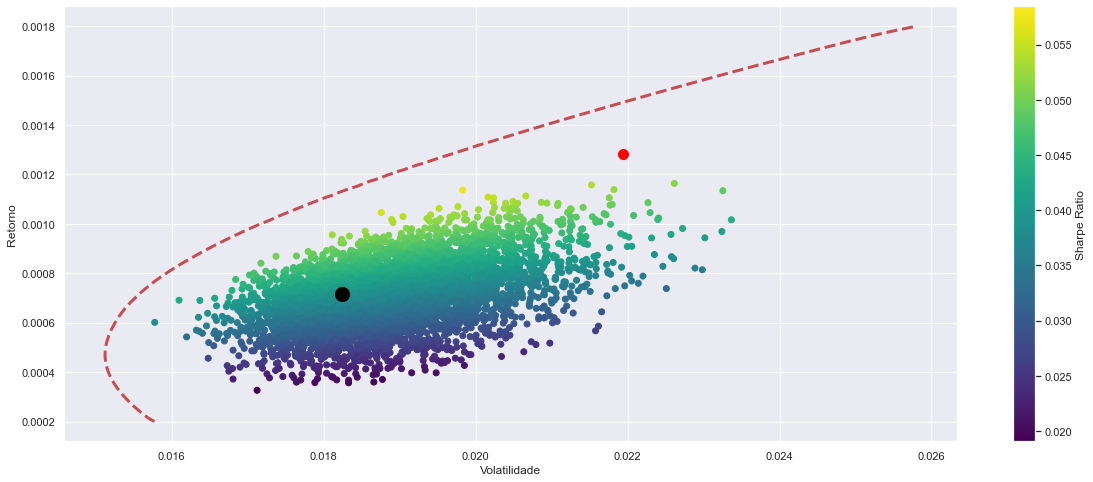

In [13]:
sns.set()

plt.figure(figsize=(20,8))
plt.scatter("volatilidade", "taxa_retorno", data=sharpe, c="indice_sharpe", cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(fronteira_x, fronteira_y, 'r--', linewidth=3)
plt.scatter(volatilidade_carteira, taxa_retorno_carteira, c='black', s=200)
plt.scatter(melhor_volatilidade, melhor_taxa_retorno, c='red', s=100)
plt.show()

***
## <font color="green">4 - Análise dos Dados</font>
***

### 4.1 - Analisando o desempenho da carteira ao longo do tempo
***

O primeiro gráfico mostra o desempenho do valor das ações desde 2015 até junho de 2022. No mesmo gráfico é plotado o desempenho do índice IBOVESPA no mesmo período.

In [14]:
# São construídos os datasets que alimentarão o gráfico
acoes_melted = pd.melt(acoes.drop(columns="BVSP"), id_vars=["Data de Negociação"], var_name="Ação", value_name="Valor")
bvsp = acoes[["Data de Negociação","BVSP"]]

array([<AxesSubplot:xlabel='Data de Negociação', ylabel='Valor'>,
       <AxesSubplot:xlabel='Data de Negociação', ylabel='BVSP'>],
      dtype=object)

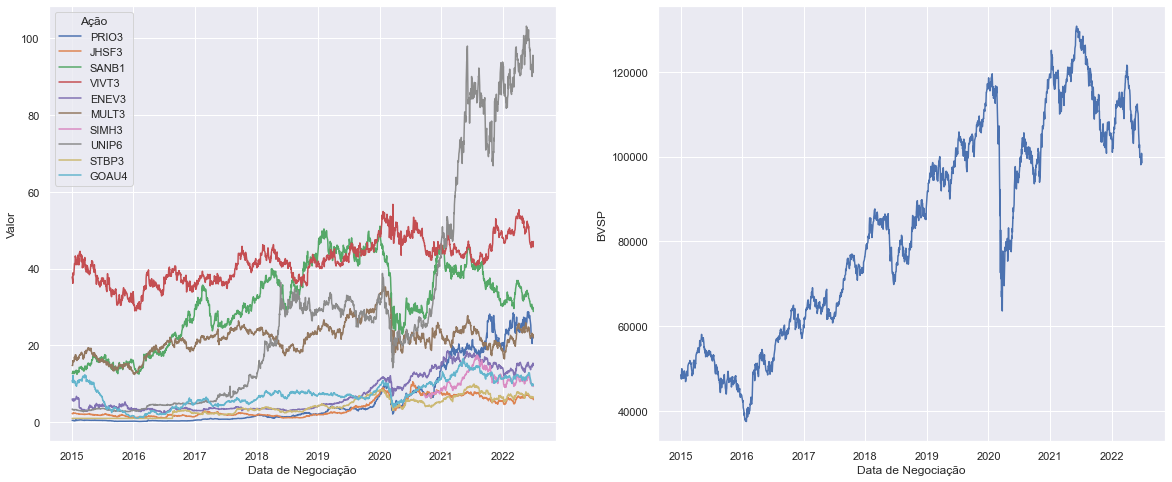

In [65]:
fig, ax = plt.subplots(1,2)
sns.lineplot(data=acoes_melted, x="Data de Negociação", y="Valor", hue="Ação", ax=ax[0])
sns.lineplot(data=bvsp, x="Data de Negociação", y="BVSP", ax=ax[1])
fig.set_size_inches(20, 8)
ax

O próximo gráfico demonstra a evolução das taxas de retorno (ações da carteira e IBOVESPA) ao longo do mesmo período do gráfico anterior.

In [16]:
# Acrescenta o log-retorno do índice IBOVESPA para possibilitar a comparação das taxas de retorno
taxas_retorno["BVSP"] = np.log(bvsp["BVSP"]/bvsp["BVSP"].shift(1))

# Prepara os dados para plotar no gráfico de linhas
taxas_retorno_melted = pd.melt(taxas_retorno, id_vars=["Data de Negociação"], var_name="Ação", value_name="Retorno")

<AxesSubplot:xlabel='Data de Negociação', ylabel='Retorno'>

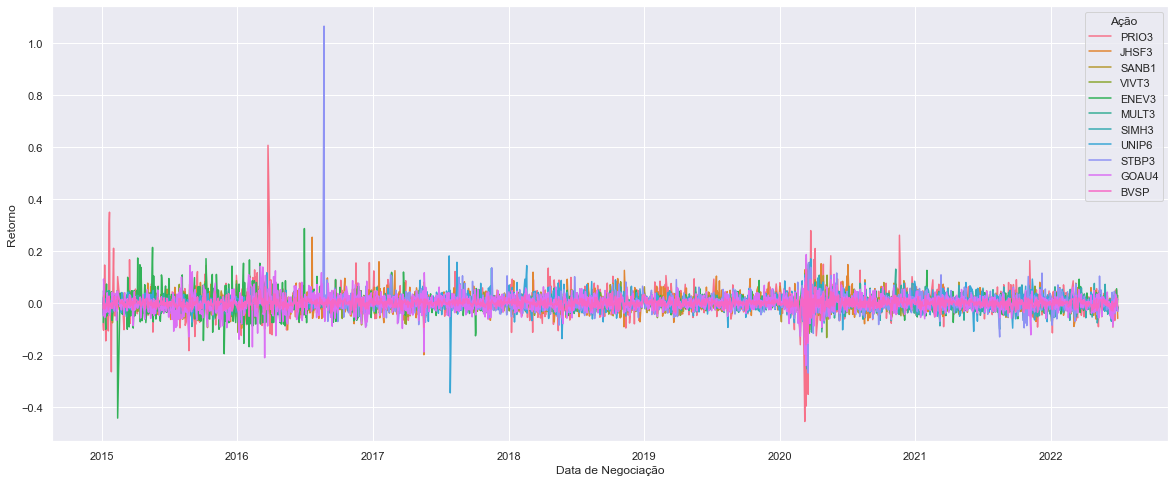

In [17]:
ax = sns.lineplot(data=taxas_retorno_melted, x="Data de Negociação", y="Retorno", hue="Ação")
ax.figure.set_size_inches(20, 8)
ax

Aqui é adicionada as taxas de retorno diárias da médias das ações que compõem a carteira.

In [18]:
carteira = taxas_retorno.drop(columns=["Data de Negociação", "BVSP"])
taxas_retorno["CARTEIRA"] = carteira.sum(axis=1) / carteira.shape[1]
taxas_retorno.fillna(0, inplace=True)
taxas_retorno.head()

,Data de Negociação,PRIO3,JHSF3,SANB1,VIVT3,ENEV3,MULT3,SIMH3,UNIP6,STBP3,GOAU4,BVSP,CARTEIRA
0,2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,2015-01-05,-0.077962,-0.036534,-0.007101,-0.020030,-0.074108,-0.001357,0.0,-0.043485,0.0,-0.048282,-0.020724,-0.030886
2,2015-01-06,-0.103451,0.004640,0.007101,-0.025131,0.025318,0.048575,0.0,0.021979,0.0,0.093457,0.010134,0.007249
3,2015-01-07,-0.002729,0.000000,0.040822,0.033726,0.024693,0.033902,0.0,0.000000,0.0,0.070758,0.030003,0.020117
4,2015-01-08,0.032261,0.088553,-0.016743,0.039848,0.024098,-0.010682,0.0,0.000000,0.0,-0.034327,0.009657,0.012301


Assim como feito para as ações, o gráfico exibe o desempenho da carteira toda em comparação com o índice IBOVESPA.

<AxesSubplot:xlabel='Data de Negociação', ylabel='Retorno'>

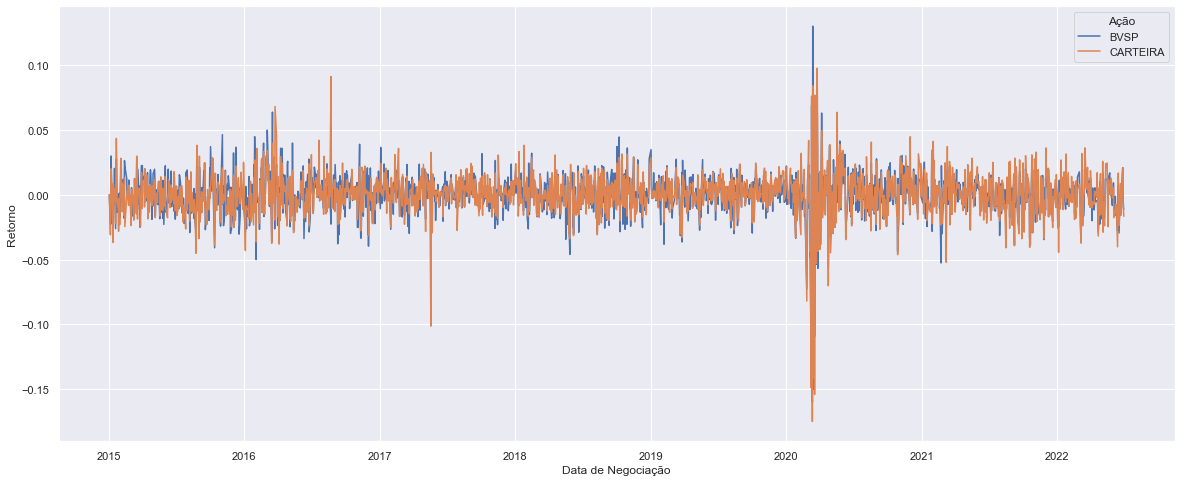

In [19]:
taxas_retorno_melted = pd.melt(taxas_retorno, id_vars=["Data de Negociação"], var_name="Ação", value_name="Retorno")
ax = sns.lineplot(data=taxas_retorno_melted.query("Ação in ['CARTEIRA', 'BVSP']"), x="Data de Negociação", y="Retorno", hue="Ação")
ax.figure.set_size_inches(20, 8)
ax

### 4.2 - Boxplot das Taxas de Retorno
***

O gráfico a seguir mostra um boxplot para cada taxa de retorno para cada uma das ações da carteira e do índice IBOVESPA durante o período estipulado.

<AxesSubplot:xlabel='Retorno', ylabel='Ação'>

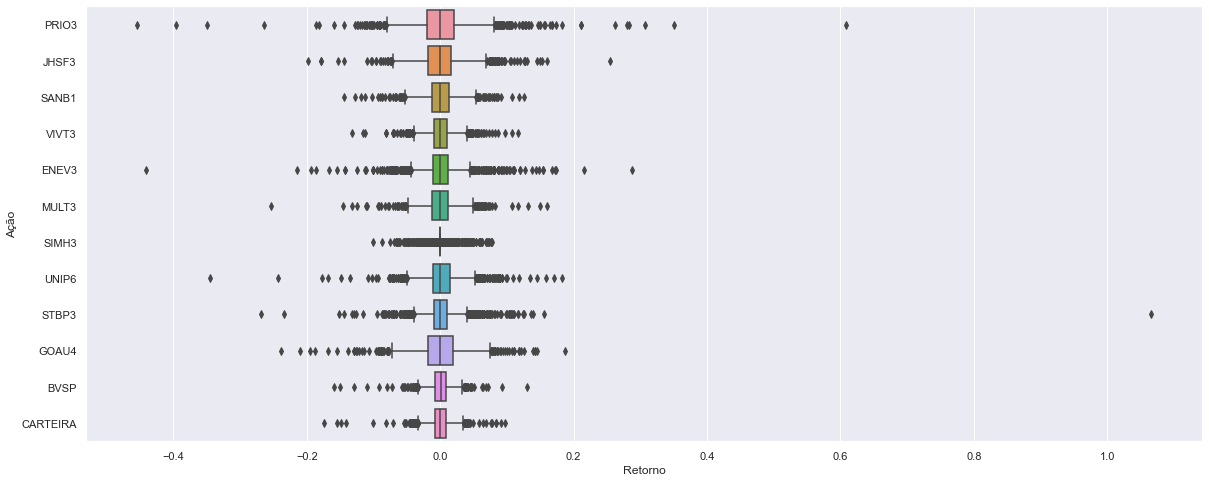

In [20]:
ax = sns.boxplot(data=taxas_retorno_melted, x="Retorno", y="Ação", orient="h")
ax.figure.set_size_inches(20, 8)
ax

### 4.3 - Análise descritiva dos dados
***

Por fim, as tabelas seguintes mostram as médias (mean) e variâncias (var) dos preços das ações/IBOVESPA, e das taxas de retorno.

In [21]:
acoes_melted.drop(columns="Data de Negociação").groupby("Ação").agg(["mean", "var"])

Valor            
            mean         var
Ação                        
ENEV3   7.322909   24.759561
GOAU4   7.433126   11.667461
JHSF3   3.590671    5.907117
MULT3  21.656079   16.456285
PRIO3   6.123840   65.919825
SANB1  31.169055  106.506949
SIMH3  10.952744    6.454030
STBP3   3.943716    5.672263
UNIP6  28.799441  806.345029
VIVT3  41.928298   29.808965

In [22]:
taxas_retorno_melted.drop(columns="Data de Negociação").groupby("Ação").agg(["mean", "var"])

Retorno          
              mean       var
Ação                        
BVSP      0.000346  0.000268
CARTEIRA  0.000674  0.000287
ENEV3     0.000485  0.001191
GOAU4    -0.000067  0.001179
JHSF3     0.000516  0.001139
MULT3     0.000213  0.000569
PRIO3     0.002101  0.002268
SANB1     0.000439  0.000558
SIMH3     0.000125  0.000204
STBP3     0.001034  0.001405
UNIP6     0.001773  0.000829
VIVT3     0.000117  0.000363

### 4.4 - Calculando a covariância e a correlação entre taxas de retorno
***

In [23]:
taxas_retorno.cov()

,PRIO3,JHSF3,SANB1,VIVT3,ENEV3,MULT3,SIMH3,UNIP6,STBP3,GOAU4,BVSP,CARTEIRA
PRIO3,0.002268,0.000405,0.000336,0.000182,0.000260,0.000339,0.000061,0.000308,0.000308,0.000553,0.000355,0.000502
JHSF3,0.000405,0.001139,0.000306,0.000156,0.000249,0.000383,0.000108,0.000226,0.000353,0.000403,0.000293,0.000373
SANB1,0.000336,0.000306,0.000558,0.000157,0.000148,0.000297,0.000038,0.000173,0.000196,0.000368,0.000290,0.000258
VIVT3,0.000182,0.000156,0.000157,0.000363,0.000102,0.000156,0.000017,0.000094,0.000094,0.000139,0.000138,0.000146
ENEV3,0.000260,0.000249,0.000148,0.000102,0.001191,0.000169,0.000079,0.000178,0.000239,0.000149,0.000157,0.000277
MULT3,0.000339,0.000383,0.000297,0.000156,0.000169,0.000569,0.000089,0.000188,0.000294,0.000292,0.000270,0.000277
SIMH3,0.000061,0.000108,0.000038,0.000017,0.000079,0.000089,0.000204,0.000047,0.000114,0.000042,0.000051,0.000080
UNIP6,0.000308,0.000226,0.000173,0.000094,0.000178,0.000188,0.000047,0.000829,0.000228,0.000274,0.000182,0.000254
STBP3,0.000308,0.000353,0.000196,0.000094,0.000239,0.000294,0.000114,0.000228,0.001405,0.000213,0.000201,0.000344
GOAU4,0.000553,0.000403,0.000368,0.000139,0.000149,0.000292,0.000042,0.000274,0.000213,0.001179,0.000363,0.000361


In [24]:
taxas_retorno.corr()

,PRIO3,JHSF3,SANB1,VIVT3,ENEV3,MULT3,SIMH3,UNIP6,STBP3,GOAU4,BVSP,CARTEIRA
PRIO3,1.000000,0.251942,0.298971,0.200583,0.158114,0.298221,0.089237,0.224768,0.172593,0.338368,0.454617,0.621972
JHSF3,0.251942,1.000000,0.383611,0.242257,0.213739,0.475554,0.224562,0.233059,0.278947,0.348156,0.530222,0.651791
SANB1,0.298971,0.383611,1.000000,0.349740,0.181361,0.526243,0.111393,0.254097,0.221583,0.453329,0.749166,0.643489
VIVT3,0.200583,0.242257,0.349740,1.000000,0.155580,0.344083,0.062871,0.170932,0.131985,0.212102,0.443228,0.452308
ENEV3,0.158114,0.213739,0.181361,0.155580,1.000000,0.205839,0.160144,0.179531,0.184742,0.125857,0.278401,0.472727
MULT3,0.298221,0.475554,0.526243,0.344083,0.205839,1.000000,0.260111,0.273159,0.328388,0.356422,0.690878,0.686327
SIMH3,0.089237,0.224562,0.111393,0.062871,0.160144,0.260111,1.000000,0.115070,0.212764,0.086181,0.218009,0.330022
UNIP6,0.224768,0.233059,0.254097,0.170932,0.179531,0.273159,0.115070,1.000000,0.210910,0.277481,0.386213,0.521601
STBP3,0.172593,0.278947,0.221583,0.131985,0.184742,0.328388,0.212764,0.210910,1.000000,0.165392,0.327575,0.542034
GOAU4,0.338368,0.348156,0.453329,0.212102,0.125857,0.356422,0.086181,0.277481,0.165392,1.000000,0.645425,0.620774


### 4.5 - Plotando o gráfico de correlação entre as taxas de retorno
***

o gráfico de calor a seguir ilustra a correlação entre as taxas de retorno das ações contidas na carteira, da média das taxas de retorno das carteira (CARTEIRA) e do índice IBOVESPA (^BVSP).
O conforme os dados, observa-se uma correlação positiva, ou sema, quanto mais próximo de 1, maior é o impacto de uma ação em relação a outra.

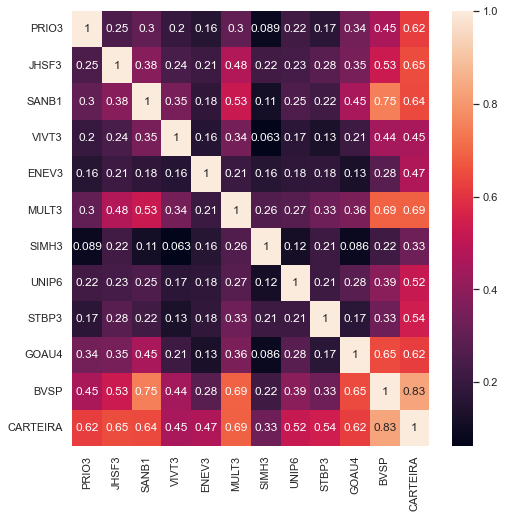

In [64]:
plt.figure(figsize=(8, 8))
sns.heatmap(taxas_retorno.corr(), annot=True);

***
## <font color="green">5 - Testes de Hipóteses</font>
***

Como demonstrado nos exemplos de aula teórica, existe uma necessidade de se estimar um modelo homecedástico, ou seja, que os erros possuem variância comum. Além da normalidade, esse é um pressuposto para a realização da Análise de Variância (ANOVA). Em seguida serão realizados os testes de Levene e Bartlett em cima dos desempenhos das taxas de retorno da carteira (CARTEIRA) e do índice IBOVESPA (^BVSP).

Onde:

$H_0:$ homocedasticidade das variâncias

$H_1:$ heterocedasticidade das variâncias

$\alpha =$ 0.05 (Significância de 5%)

In [26]:
significancia = 0.05 # significância de 5%

### 5.1 - Teste de Levene
***

In [27]:
stat_teste, p_valor = levene(taxas_retorno["CARTEIRA"], taxas_retorno["BVSP"])
print(f"Estatística-teste: {stat_teste}")
print(f"P-valor: {p_valor}")

if p_valor <= significancia:
    print("Rejeita H0")
else:
    print("Não Rejeita H0")

Estatística-teste: 0.060031629460843026
P-valor: 0.8064594629333651
Não Rejeita H0


Ao aplicar os testes de Levene nos dois grupos tanto da carteira, quanto do índice IBOVESPA, a hipótese nula $H_0$ não foi rejeitada, indicando homocedasticidade ou homogeneidade das variâncias entre os diferentes grupos.

### 5.2 - Teste de Bartlett
***

In [28]:
stat_teste, p_valor = bartlett(taxas_retorno["CARTEIRA"], taxas_retorno["BVSP"])
print(f"Estatística-teste: {stat_teste:0.4f}")
print(f"P-valor: {p_valor:0.4f}")

if p_valor <= significancia:
    print("Rejeita H0")
else:
    print("Não Rejeita H0")

Estatística-teste: 2.1438
P-valor: 0.1432
Não Rejeita H0


A partir do Teste de Bartlett, também se observa a não rejeição de $H_0$, de maneira igual ao teste de Levene.

### 5.3 - Teste ANOVA
***

Com os dados das médias de ambos os tipos de taxa de retorno (Carteira e IBOVESPA) reunidos, é realizado o teste ANOVA e montada a tabela com o resultado, demonstrando a comparação entre as médias.

O teste ANOVA compara médias de diferentes populações para verificar se essas populações possuem médias iguais ou não.

Onde:
<br>
$H_0: \mu_{1} = \mu_{2} = \mu_{3} = ... = \mu_{n}$

$H_1 =$ nem todas as médias de taxa de retorno são iguais

$\alpha =$ 0.05

In [29]:
# Create ANOVA backbone table
data = [["Entre grupos", "", "", "", "", "", ""], ["Dentro dos grupos", "", "", "", "", "", ""], ["Total", "", "", "", "", "", ""]]
anova_table = pd.DataFrame(data, columns = ["Fonte da Variação", "SS", "df", "MS", "F", "P-value", "F crit"])
anova_table.set_index("Fonte da Variação", inplace = True)

# calculate SSTR and update anova table
x_bar = taxas_retorno_melted["Retorno"].mean()
SSTR = taxas_retorno_melted.groupby("Ação").count() * (taxas_retorno_melted.groupby("Ação").mean() - x_bar)**2
anova_table["SS"]["Entre grupos"] = SSTR["Retorno"].sum()

# calculate SSE and update anova table
SSE = (taxas_retorno_melted.groupby("Ação").count() - 1) * taxas_retorno_melted.groupby("Ação").std()**2
anova_table["SS"]["Dentro dos grupos"] = SSE["Retorno"].sum()

# calculate SSTR and update anova table
SSTR = SSTR["Retorno"].sum() + SSE["Retorno"].sum()
anova_table["SS"]["Total"] = SSTR

# update degree of freedom
anova_table["df"]["Entre grupos"] = taxas_retorno_melted["Ação"].nunique() - 1
anova_table["df"]["Dentro dos grupos"] = taxas_retorno_melted.shape[0] - taxas_retorno_melted["Ação"].nunique()
anova_table["df"]["Total"] = taxas_retorno_melted.shape[0] - 1

# calculate MS
anova_table["MS"] = anova_table["SS"] / anova_table["df"]

# calculate F
F = anova_table["MS"]["Entre grupos"] / anova_table["MS"]["Dentro dos grupos"]
anova_table["F"]["Entre grupos"] = F

# p-value
anova_table["P-value"]["Entre grupos"] = 1 - f.cdf(F, anova_table["df"]["Entre grupos"], anova_table["df"]["Dentro dos grupos"])

# F critical
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table["F crit"]["Entre grupos"] = f.ppf(1-alpha, anova_table["df"]["Entre grupos"], anova_table["df"]["Dentro dos grupos"])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Fonte da Variação,,,,,,
Entre grupos,0.009234,11,0.000839,0.981697,0.460318,1.993308
Dentro dos grupos,19.096441,22332,0.000855,,,
Total,19.105676,22343,0.000855,,,


Pelo resultado mostrado na tabela acima, não se pode rejeitar a hipótese nula $H_0$ de que as médias das taxas de retorno da Carteira são iguais às médias das taxas de retorno do índice IBOVESPA.

In [30]:
p_valor = anova_table["P-value"]["Entre grupos"]
print(f"P-valor: {p_valor:0.4f}")

if p_valor <= significancia:
    print("Rejeita H0")
else:
    print("Não Rejeita H0")

P-valor: 0.4603
Não Rejeita H0


***
## <font color="green">6 - Regressão Linear</font>
***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

#### Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente ou explicativa (*X*).

### 6.1 - Análise gráfica variáveis de interesse
***

Inicialmente é feita uma inspeção visual dos histogramas de alguns retornos. Por fim, adicionalmente, é feita uma análise gráfica do comportamento entre as variáveis de interesse.

#### 6.1.1 - Distribuição das taxas de retorno da carteira

Text(0.5, 0, 'Retorno')

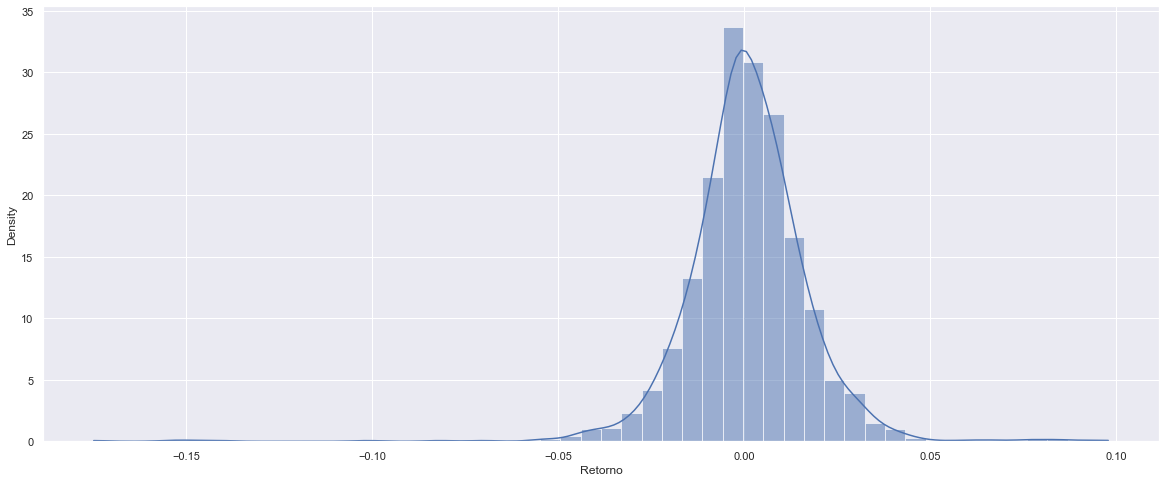

In [63]:
ax = sns.histplot(data=taxas_retorno["CARTEIRA"], kde=True, stat="density", bins=50)
ax.figure.set_size_inches(20, 8)
ax.set_xlabel("Retorno")

#### 6.1.2 - Distribuição das taxas de retorno do índice IBOVESPA

Text(0.5, 0, 'Retorno')

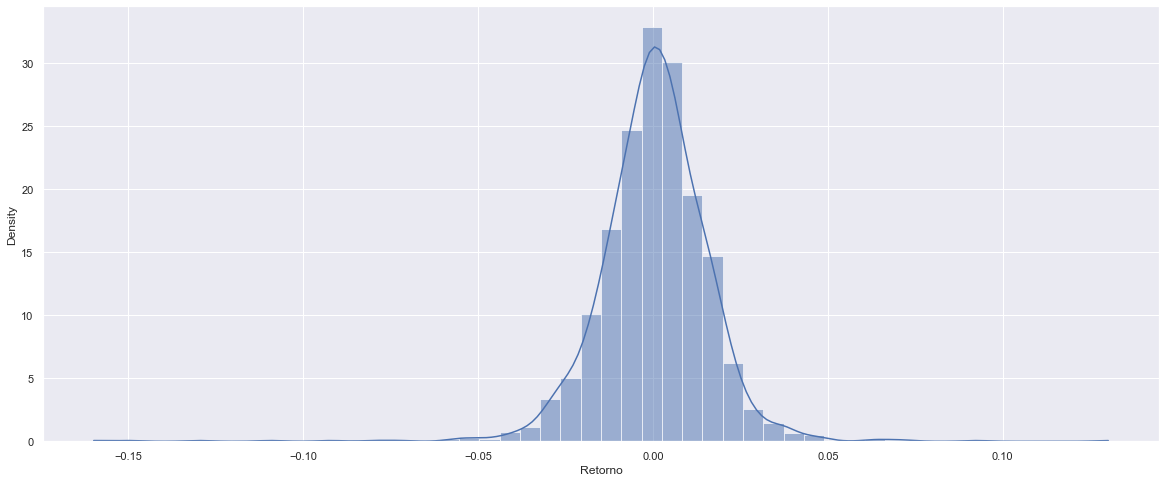

In [62]:
ax = sns.histplot(data=taxas_retorno["BVSP"], kde=True, stat="density", bins=50)
ax.figure.set_size_inches(20, 8)
ax.set_xlabel("Retorno")

#### 6.1.3 - Relação linear entre as taxas de retorno da carteira e do índice IBOVESPA

Reta de regressão.

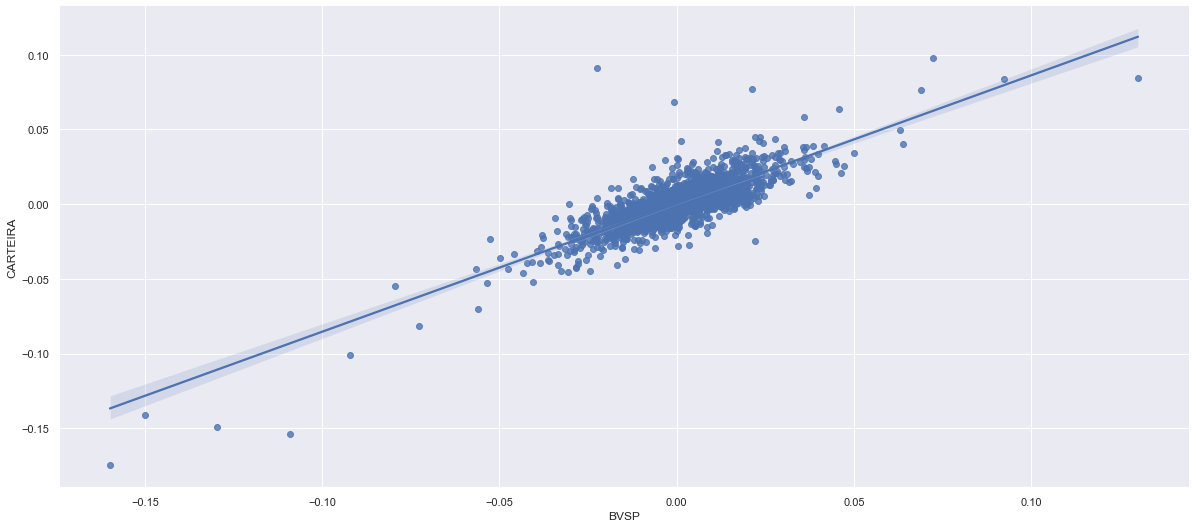

In [61]:
ax = sns.lmplot(x="BVSP", y="CARTEIRA", data=taxas_retorno)
ax.fig.set_size_inches(20, 8)

Gráfico de correlação.

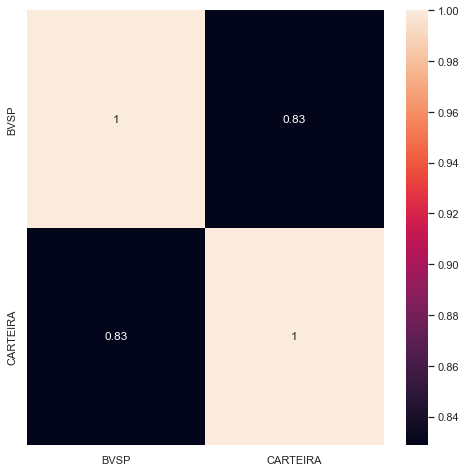

In [66]:
plt.figure(figsize=(8, 8))
sns.heatmap(taxas_retorno.filter(["BVSP", "CARTEIRA"]).corr(), annot=True);

Pela reta de regressão e pelo gráfico de correlação é possível afirmar que existe uma relação linear entre as variáveis. Segundo o gráfico de correlação é possível quantificar a intensidade dessa relação.

### 6.2 - Estimando o Modelo de Regressão
***

De modo a estimar o modelo pelos Mínimos Quadrados Ordinários (MQO ou OLS em ingês), definindo o retorno de um ativo qualquer $Ri$ como a variável dependente e o índice _IBOVESPA_ como a variável independente, fazemos uso da função ols da biblioteca StatsModels do Python para realizar uma regressão linear simples. Este modelo é conhecido como Market Model.

$$\mathbb{E}(R_i) = \beta_1 + \beta_2 ⋅ \mathbb{E}(R_m)$$

Onde:

$\mathbb{E}(R_i)$ = taxa de retorno da carteira

$\mathbb{E}(R_m)$ = taxa de retorno do índice IBOVESPA

$\beta_1$ = intercepto (no modelo teórico acima, é conhecido como taxa de retorno autônoma, ou seja, a taxa de retorno da carteira quando a taxa de retorno do índice IBOVESPA é zero)

$\beta_2$ = coefiente angular (no modelo teórico, indica em que proporção a taxa de retorno da carteira aumenta quando há um aumento da taxa de retorno do índice IBOVESPA)

In [35]:
modelo = smf.ols(data=taxas_retorno.filter(["BVSP","CARTEIRA"]), formula="CARTEIRA ~ BVSP")
modelo_ajustado = modelo.fit()
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:               CARTEIRA   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     4077.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:46:09   Log-Likelihood:                 6031.3
No. Observations:                1862   AIC:                        -1.206e+04
Df Residuals:                    1860   BIC:                        -1.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.713      0.0

Relação entre

In [ ]:
print()

### 6.3 - Diagnóstico do modelo
***

#### 6.3.1 - O coeficiente de determinação $R^2$

O **coeficiente de determinação $R^2$** é uma medida resumida que diz quanto a linha de regressão se ajusta aos dados.

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente estivessem sobre a reta de regressão estimada. Quando o ajuste não é tão perfeito, $R^2$ diminui e em uma situação de total imperfeição do ajuste teríamos $R^2 = 0$.

Ou seja, $R^2$ pode assumir valores entre 0 e 1 e é utilizado como medida de eficiência do ajuste da equação de regressão estimada.

Somente com a utilização do $R^2$ não é possível tirar conclusões sobre a relação entre a variável dependente e a variável explicativa ser ou não ser estatisticamente significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [45]:
print(f"{modelo_ajustado.rsquared:0.6f}")

0.686689


#### 6.3.2 - Erro quadrático médio

O erro quadrático médio fornece a média de diferença quadrática entre a predição do modelo e o valor real. Ele pode ser usado como a medida da qualidade de um estimador.

In [46]:
print(f"{modelo_ajustado.mse_resid:0.6f}")

0.000090


#### 6.3.3 - Teste de hipótese de nulidade do coeficiente angular

Considere o seguinte modelo de regressão linear simples:

$$Y_i = \beta_1 + \beta_2X_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

$$H_0: \beta_2 = 0$$
$$H_1: \beta_2 \neq 0$$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis. A estatística de teste (t) segue uma distribuição t de Student com $n-2$ graus de liberdade.

In [49]:
stat_teste = modelo_ajustado.tvalues[1]
p_valor = modelo_ajustado.pvalues[1]

print(f"Estatística-teste: {stat_teste:0.6f}")
print(f"P-valor: {p_valor:0.6f}")

if p_valor <= significancia:
    print("Rejeita H0")
else:
    print("Não Rejeita H0")

Estatística-teste: 63.848163
P-valor: 0.000000
Rejeita H0


***
## <font color="green">7 - Prevendo o modelo com Machine Learning</font>
***

#### 6.3.4 - Resíduos

O resíduo é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente. Ou seja, é a diferença entre o valor observado e o estimado da variável dependente.

QQPlot

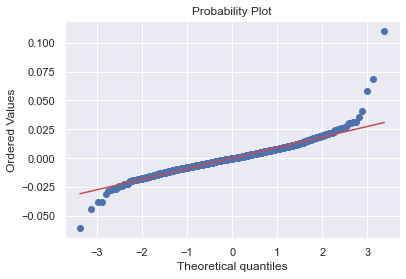

In [58]:
(_, (_, _, _)) = probplot(modelo_ajustado.resid, plot=plt)

Resíduos vs Previstos

<AxesSubplot:xlabel='Previsto', ylabel='Resíduos'>

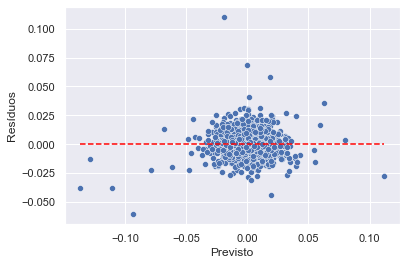

In [71]:
ax = sns.scatterplot(x=modelo_ajustado.fittedvalues, y=modelo_ajustado.resid)
# ax.figure.set_size_inches(12, 6)
# ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.hlines(y=0, xmin=modelo_ajustado.fittedvalues.min(), xmax = modelo_ajustado.fittedvalues.max(), colors='red', linestyles='dashed')
ax.set_xlabel('Previsto')
ax.set_ylabel('Resíduos')
ax

Histograma

<AxesSubplot:ylabel='Density'>

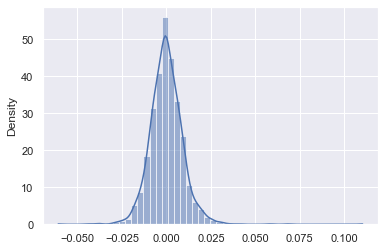

In [73]:
sns.histplot(modelo_ajustado.resid, kde=True, stat="density", bins=50)

In [77]:
dataset = pd.DataFrame([modelo_ajustado.predict(taxas_retorno["BVSP"]), modelo_ajustado.fittedvalues])
dataset

,0,1,2,3,4,5,6,7,8,9,...,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861
0,0.000377,-0.017389,0.009065,0.026098,0.008656,-0.018769,-0.011999,-0.00137,-0.006719,0.007187,...,-0.024857,0.000617,-0.001067,-0.001026,-0.012135,0.005536,0.018363,-0.001096,-0.007921,-0.008968
1,0.000377,-0.017389,0.009065,0.026098,0.008656,-0.018769,-0.011999,-0.00137,-0.006719,0.007187,...,-0.024857,0.000617,-0.001067,-0.001026,-0.012135,0.005536,0.018363,-0.001096,-0.007921,-0.008968
